# Computational Social Science Project #3 

**Enter your Name:** Joel Tam

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

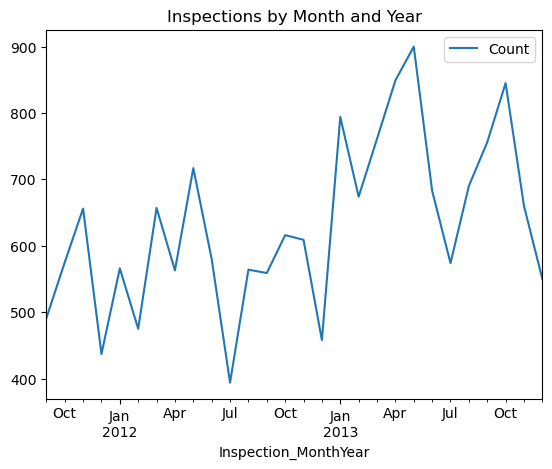

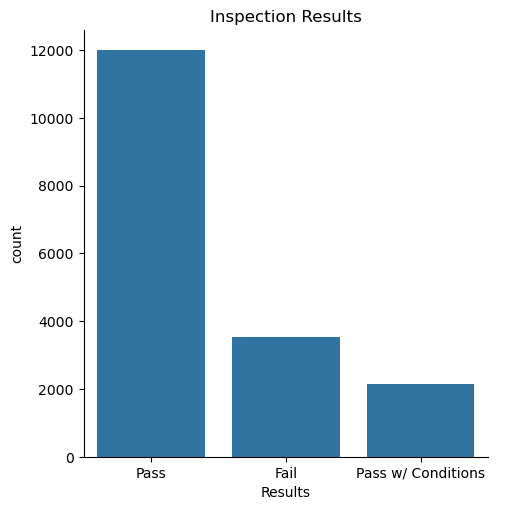

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

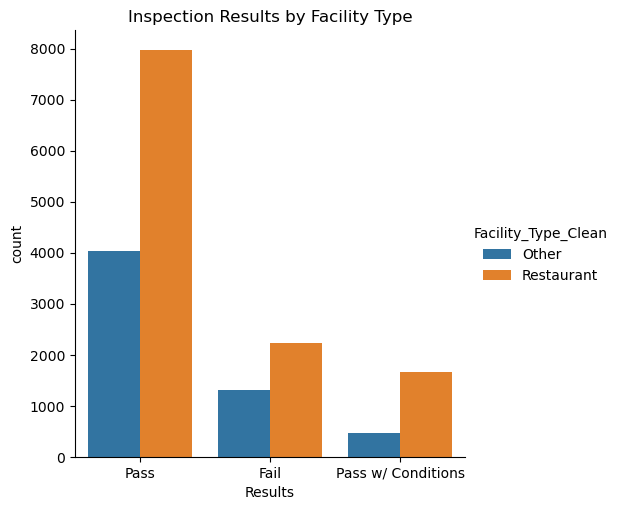

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X,                 # specify training dataset
                                                            y,                 # specify test dataset
                                                            train_size=0.75,      # specify proportional split for training
                                                            test_size=0.25,     # specify proportional split for test
                                                            random_state= 10)       

In [14]:
print(X_validate.size / (X_train.size + X_validate.size))
print(y_validate.size / (y_train.size + y_validate.size))

0.25001632813010255
0.25001632813010255


### Model 1
Logistic regression is a simple and interpretable model which is a good baseline to gain basic insights into feature importance. This model assumes a linear relationship between the features and the log-odds of the target variable. 
- Pros: simple, interpretable, efficient
- Cons: may not capture complex patterns (non-linear)
- Plausibility: good for initial modeling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [16]:
logit_reg = LogisticRegression()
logit_model = logit_reg.fit(X_train, y_train.ravel())
y_pred = logit_model.predict(X_validate)

In [17]:
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

#### Hyperparameter Tuning

In [18]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9203239289446186


#### Evaluation Metrics

In [19]:
mod1_accuracy = accuracy_score(y_validate, y_pred)
mod1_recall = recall_score(y_validate, y_pred)
mod1_precision = precision_score(y_validate, y_pred)
mod1_f1 = f1_score(y_validate, y_pred)

###  Model 2

XGBoost uses gradient boosting to improve the performance of decision trees. XGBoost doesn't assume a linear relationship between features and target variables.
- Pros: handles non-linear relationships, can handle missing data
- Cons: less interpretable than simpler models
- Plausibility: good for capturing complex patterns, so good for predicitive tasks where accuracy is needed.

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Execute the grid search and fit to training data
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=3)
xgb_grid.fit(X_train, y_train)

# Choose best performing model
best_xgb_model = xgb_grid.best_estimator_
y_pred = best_xgb_model.predict(X_validate)

# Print best parameters and validation accuracy
print(xgb_grid.best_params_)
print('Validation Accuracy:', accuracy_score(y_validate, y_pred))

In [ ]:
mod2_accuracy = accuracy_score(y_validate, y_pred)
mod2_recall = recall_score(y_validate, y_pred)
mod2_precision = precision_score(y_validate, y_pred)
mod2_f1 = f1_score(y_validate, y_pred)

###  Model 3

VotingClassifier is an ensemble learning method that combines the predicitions of multiple models to improve overall performance. It uses different types of classifiers and aggregate their predictions through majority voting (for classification) or averaging (for regression).
- Pros: reduces overfitting, improves generalization
- Cons: may require careful tuning of individual models
- Plausibility: good model for where robustness and accuracy are needed

In [ ]:
from sklearn.ensemble import VotingClassifier

logit_best_params = logit_grid.best_params_  # Best params from Logistic Regression
logit_model = LogisticRegression(**logit_best_params)

xgb_best_params = xgb_grid.best_params_  # Best params from XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **xgb_best_params)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('logit', logit_model), ('xgb', xgb_model)],
    voting='soft'  # Use soft voting for probability-based decisions
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_validate)

In [ ]:
mod3_accuracy = accuracy_score(y_validate, y_pred)
mod3_recall = recall_score(y_validate, y_pred)
mod3_precision = precision_score(y_validate, y_pred)
mod3_f1 = f1_score(y_validate, y_pred)

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

Answer: In this case, we want to prioritize the recall score as this measures how many of the actual postive cases (e.g. fails) are correctly identified. High recall is important since the cost of a false negative is high, where missing a failing inspection could lead to serious public health implications.

In [ ]:
for model in ['mod1', 'mod2', 'mod3']:
    print(model)
    print(f'Accuracy: {round(globals()[f"{model}_accuracy"], 5)}')
    print(f'Recall: {round(globals()[f"{model}_recall"], 5)}')
    print(f'Precision: {round(globals()[f"{model}_precision"], 5)}')
    print(f'F1 Score: {round(globals()[f"{model}_f1"], 5)}')

mod1
Accuracy: 0.9232
Recall: 0.87322
Precision: 0.77497
F1 Score: 0.82117
mod2
Accuracy: 0.93025
Recall: 0.93661
Precision: 0.76858
F1 Score: 0.84431
mod3
Accuracy: 0.92738
Recall: 0.91721
Precision: 0.76815
F1 Score: 0.83608


## 4. Policy Simulation

In [ ]:
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

The seriousCount feature represents the number of serious infractions or violations observed in the past. The logit model shows that there is a very high association between this feature and an inspection resulting in a fail. Establishments with a history of serious violations often struggle to meet inspection requirements, indicating operational or structural problems. The XGBoost model showed high utilization of minorCount. The minorCount rationale is similar to the rationale for seriousCount.

Features like seriousCount and minorCount provide direct evidence of past compliance issues, which often predict future behavior. Features like humidity, temperatureMax, and windSpeed represent external challenges that could impact operational quality. High humidity or temperature could contribute to challenges for cleanliness and hygiene. Other features such as Facilitiy_Type_Clean_Restaurant or POLICE_DISTRICT reflect systemic or resource driven factors that influence compliance.

The VotingClassifier model itself doesn't directly provide feature importance charts because it's an ensemble that I chose to combine my logistic regression and XGBoost models. The feature importance should be reflected in the individual models that make up the ensemble.

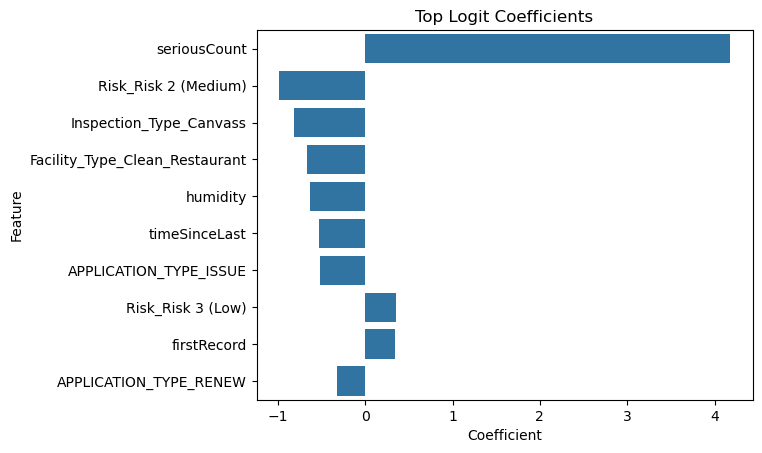

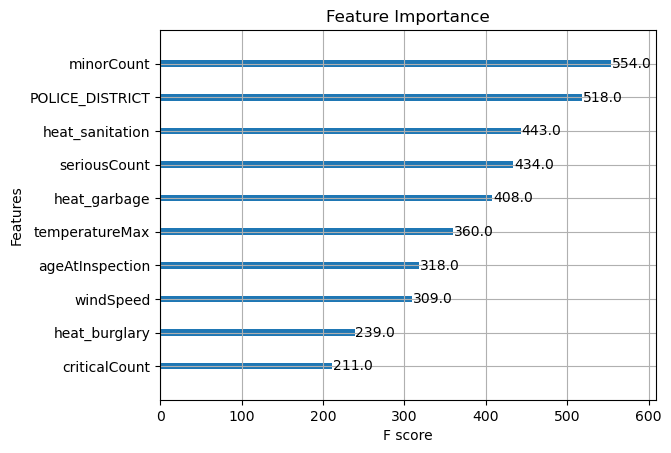

In [ ]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

# Plot feature importance
xgb.plot_importance(best_xgb_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [ ]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

y_probs = best_xgb_model.predict_proba(X)[:, 1]

audit_data = X.copy()
audit_data['prob_fail'] = y_probs
audit_data['actual_fail'] = y

In [ ]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
audit_data_sorted = audit_data.sort_values(by='prob_fail', ascending=False)

In [ ]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
audit_data_sorted.head(1000)['actual_fail'].mean()


0.966

In [ ]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
audit_data.sample(n=1000)['actual_fail'].mean()


0.181

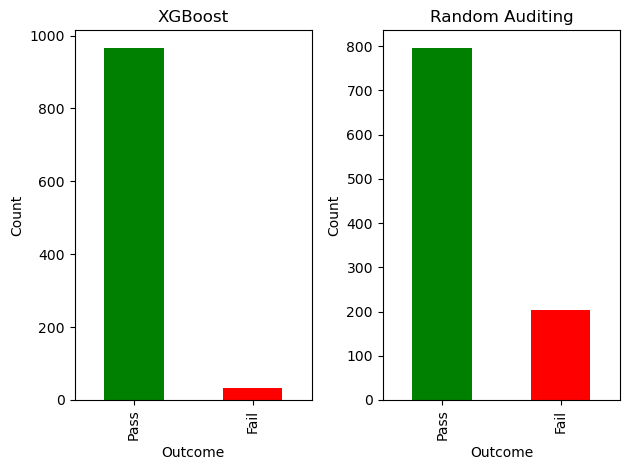

In [ ]:
plt.subplot(1, 2, 1)
audit_data_sorted.head(1000)['actual_fail'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("XGBoost")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'])

plt.subplot(1, 2, 2)
audit_data.sample(n=1000)['actual_fail'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Random Auditing")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'])

plt.tight_layout()
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [ ]:
# data processing
# -----------
chicago_inspections_2014 = chicago_inspections_2014[chicago_inspections_2011_to_2013.columns]

# process target 
# -----------
y = chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2014.drop(columns = ['Results', 
                                            'Facility_Type', 
                                            'LICENSE_DESCRIPTION', 
                                            'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.80,      # specify proportional split for training
                                                    test_size=0.20,     # specify proportional split for test
                                                    )       

In [ ]:
# predict and compare 
# -----------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Execute the grid search and fit to training data
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=3)
xgb_grid.fit(X_train, y_train)

# Choose best performing model
best_xgb_model = xgb_grid.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Print best parameters and validation accuracy
print(xgb_grid.best_params_)
print('Validation Accuracy:', accuracy_score(y_test, y_pred))

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Validation Accuracy: 0.9178378378378378


In [ ]:
# evaluate
# -----------
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 5)}')
print(f'Recall: {round(recall, 5)}')
print(f'Precision: {round(precision, 5)}')
print(f'F1 Score: {round(f1, 5)}')

Accuracy: 0.91784
Recall: 0.83051
Precision: 0.76166
F1 Score: 0.79459


0.775


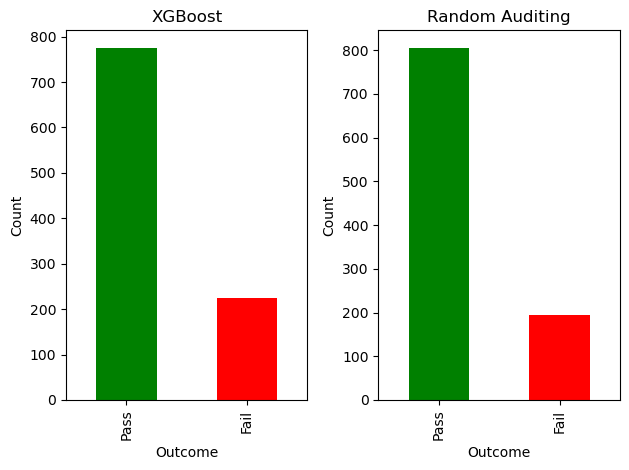

In [ ]:
y_probs = best_xgb_model.predict_proba(X)[:, 1]

audit_data = X.copy()
audit_data['prob_fail'] = y_probs
audit_data['actual_fail'] = y
audit_data_sorted = audit_data.sort_values(by='prob_fail', ascending=False)

print(audit_data_sorted.head(1000)['actual_fail'].mean())

plt.subplot(1, 2, 1)
audit_data_sorted.head(1000)['actual_fail'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("XGBoost")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'])

plt.subplot(1, 2, 2)
audit_data.sample(n=1000)['actual_fail'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Random Auditing")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'])

plt.tight_layout()
plt.show()

Using the XGBoost model to predict on the 2014 inspection data provided some interesting findings. Surprisingly, the model performed significantly worse when tested on the 2014 dataset compared to the 2011-2013 dataset. When analyzing the top 1000 establishments ranked by their predicted probability of failure, the average actual failure rate for the 2014 dataset was 0.775, compared to 0.966 for the 2011-2013 dataset. This suggests that the model has difficulty generalizing to new data, as it performs better on the training set but less so on the 2014 data. The performance metrics also highlight this issue: for the 2014 dataset, the model achieved an accuracy of 0.91784, recall of 0.83051, precision of 0.76166, and an F1 score of 0.79459. In contrast, for the 2011-2013 dataset, the model achieved higher performance with an accuracy of 0.93025, recall of 0.93661, precision of 0.76858, and an F1 score of 0.84431. These results show that while the model is quite accurate, its ability to generalize to unseen data, such as the 2014 dataset, needs improvement.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**

Relying solely on accuracy can be misleading as many real-world datasets are imbalanced. For example, in food safety inspections, the class of interest (failures/violations) is much smaller than the majority class (passing establishments). In such cases, a model might predict the majority class most of the time and still appear to perform well in terms of accuracy, despite missing potential high risk violations. <br> Metrics like recall and precisions focus on how well the model detects the positive class and how accurate these detections are. They also help balance the trade-off between false positives and false negatives, which can have significant consequences in policy decisions. F1 score, which combines both precision and recall, provides a holistic measure of model performance in these situations. Metrics like fairness and bias are important in ensuring the model does not unfairly impact certain groups, making sure the algorithm's decisions are equitable and aligned with ethical standards.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**

When establishments become aware of the algorithm being used for decision-making, they may change their behavior to avoid detection or manipulate the system, which can seem like a bad thing. However, with food safety inspections, this is actually beneficial. If establishments adjust their behavior to avoid key features that lead to audits, such as improving cleanliness or complying with health regulations, this can result in an overall improvement in public health and safety. Establishments "gaming the system" by adopting better practices can align with the policy's goal of ensuring food safety. However, to maintain the effectiveness of the algorithm with real-time behavior changes, policymakers can introduce dynamic models that adapt to these strategies. With less occurrence, but random audits can be used with the predictive algorithm to avoid predictability, making sure that establishments maintain high standards continuously, rather than only when they expect an inspection. While establishments may alter their behavior to avoid audits, doing so can contribute to achieving the desired outcomes of improved compliance and public safety, which is a win for both the policy and the public.